In [22]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt

# !pip install mlbugdetection
from mlbugdetection.monotonic import monotonicity_mse, check_monotonicity
from mlbugdetection.critical_values import find_critical_values, highest_and_lowest_indexes
from mlbugdetection.calibration import calibration_check

# from monotonic_check import monotonicity_mse, check_monotonicity
# from critical_values_finder import find_critical_values, highest_and_lowest_indexes
# from calibration_check import calibration_check

In [23]:
#manter plots salver disco
#classe 

In [24]:
with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
    RF = pickle.load(f)
with open('models/SVM/SVMTitanic.pkl', 'rb') as f:
    SVM = pickle.load(f)
models = [XGBoost, LR, RF]


C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\willi\AppData\Local\Packa

In [25]:
df = pd.read_csv('../datasets/fraud_new.csv')
df_titanic = pd.read_csv('../datasets/TitanicClean.csv')
example = df.sample(1)
example = example.drop('isFraud', axis = 1)

In [26]:
example_titanic = df_titanic.sample(1)

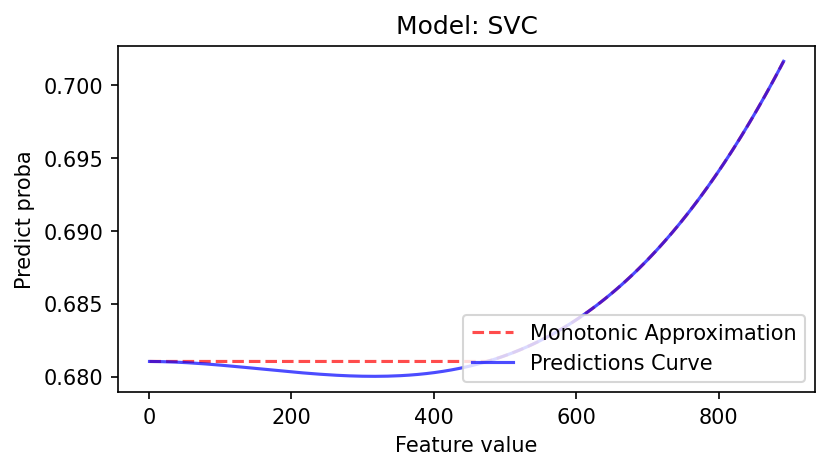

In [27]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = df_titanic[c].min()
        maxV = df_titanic[c].max()
        teste = check_monotonicity(c,minV,maxV,example_titanic, SVM, 150)
    break

In [28]:
print(teste)
teste.save_graphs()

In [29]:
print(teste.errors)
print(teste.warnings)
print(teste.metrics)
print(teste.model_info)

[]
["Feature 'PassengerId' doesn`t have monotonic behavior between ranges 1 and 891"]
{'monotonic': False, 'monotonic_score': 2.4029051152187393e-07, 'brier_score': '', 'positive_changes_ranges': [], 'negative_changes_ranges': [], 'positive_changes_proba': [], 'negative_changes_proba': [], 'classification_change_ranges': [], 'classification_change_proba': []}
{'model_name': 'SVC', 'analysed_feature': 'PassengerId', 'feature_range': (1, 891)}


In [30]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = 100
        maxV = 100
        find_critical_values(SVM, example_titanic, c, minV, maxV, step = 1000 )

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>


Highest positives changes identified on feature 'step': 

Highest positives changes identified on feature 'step': 


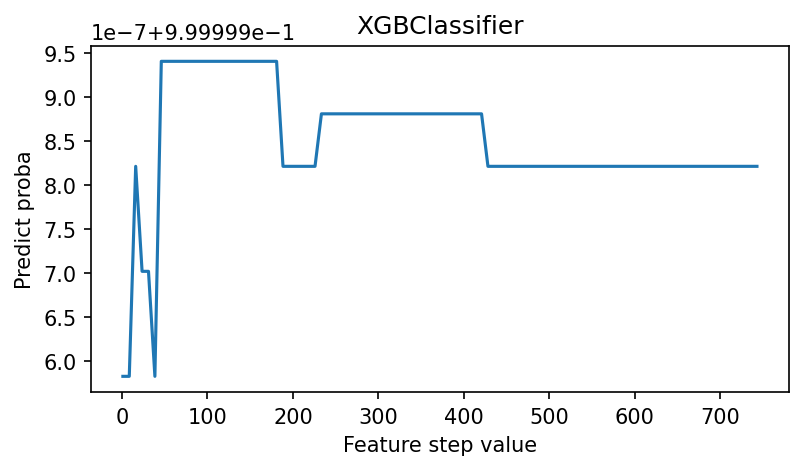

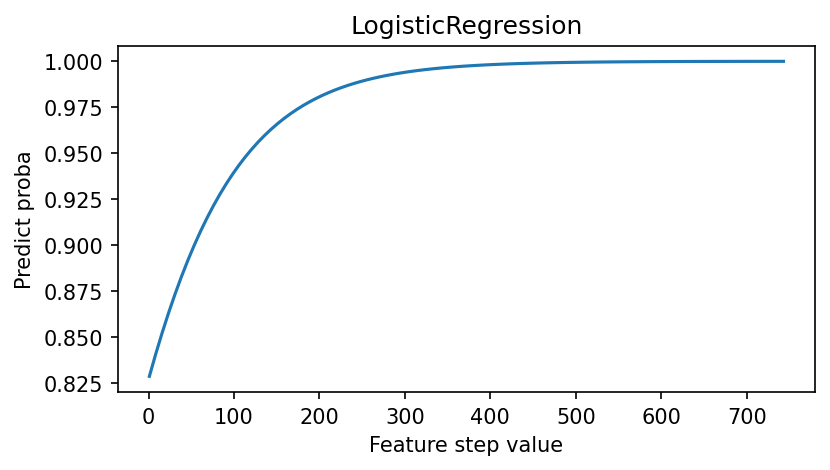

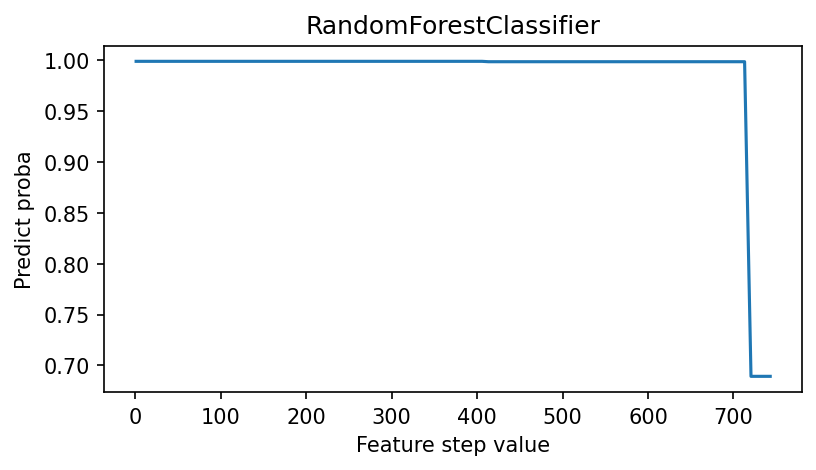

In [31]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            teste3 = find_critical_values(model, example, c, minV, maxV )
    break

c:\Users\willi\Downloads\8-semestre\pfe\MLBugDetection\src\mlbugdetection\monotonic.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


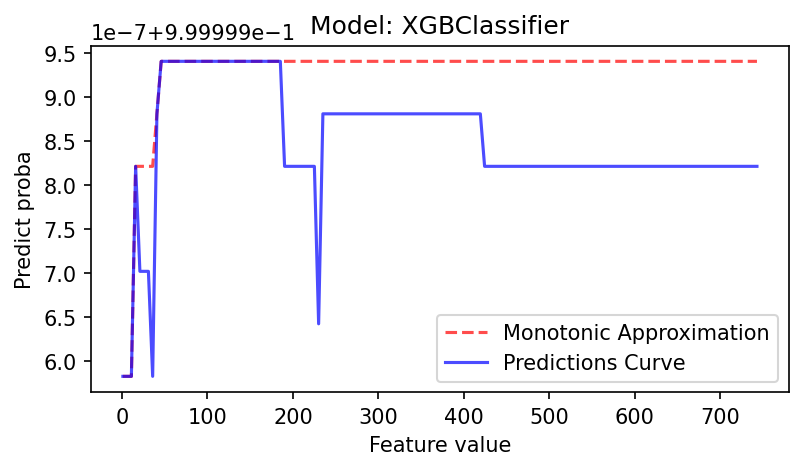

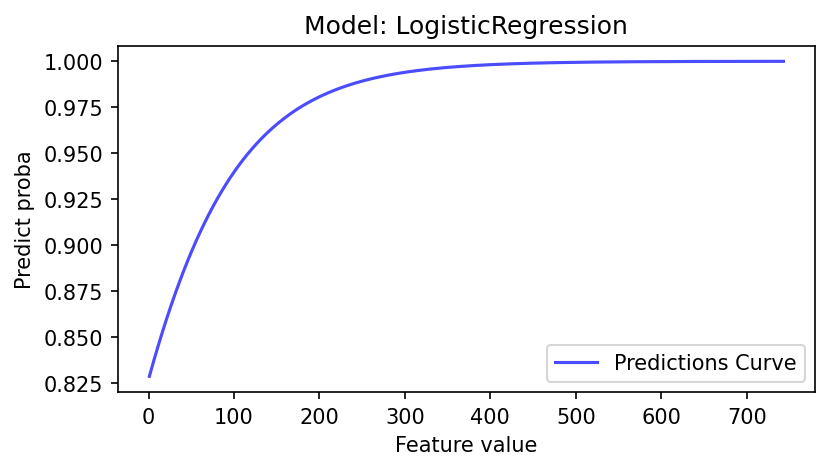

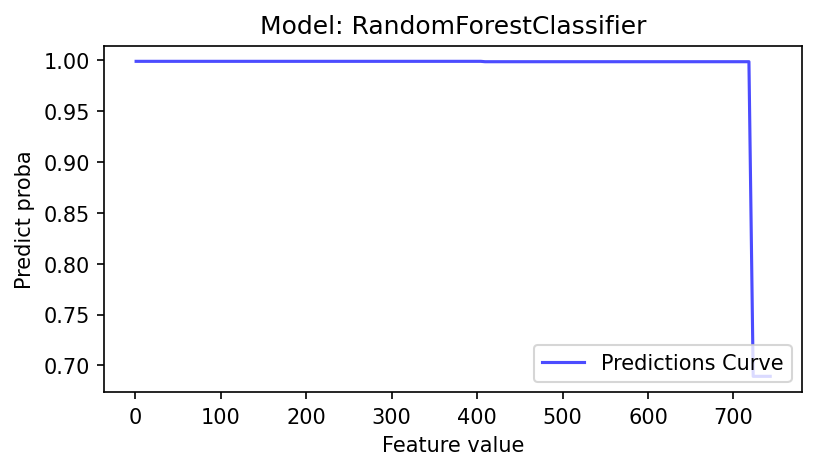

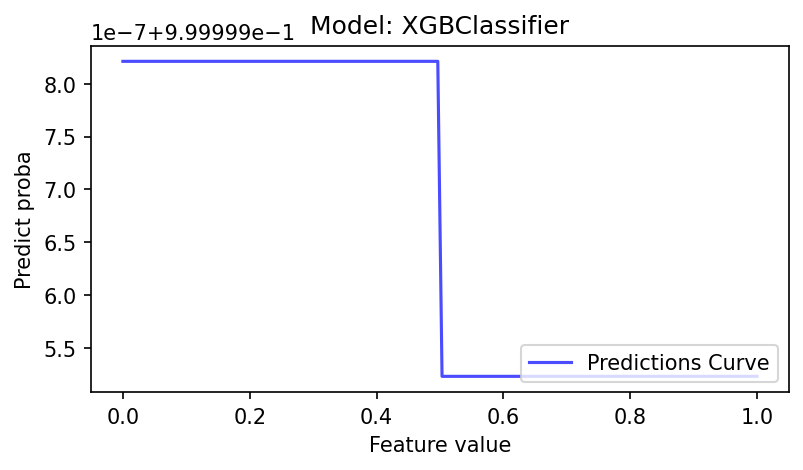

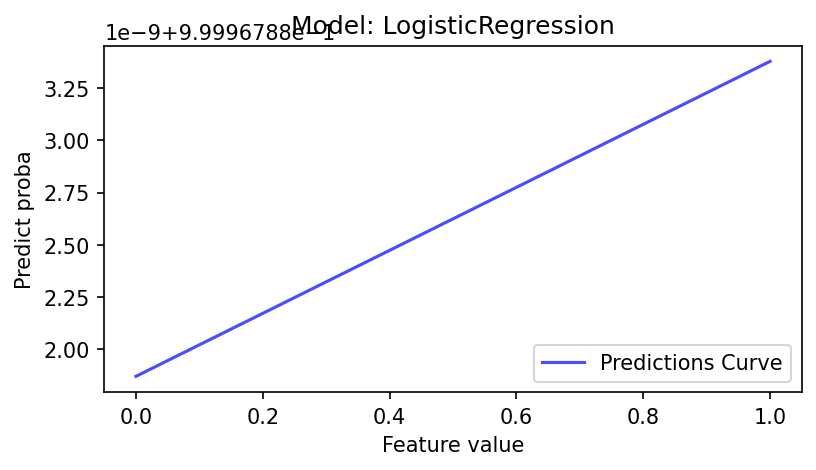

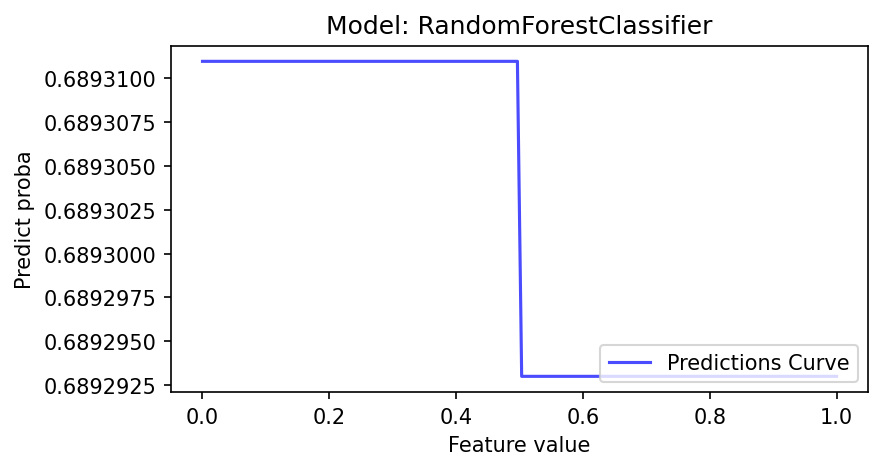

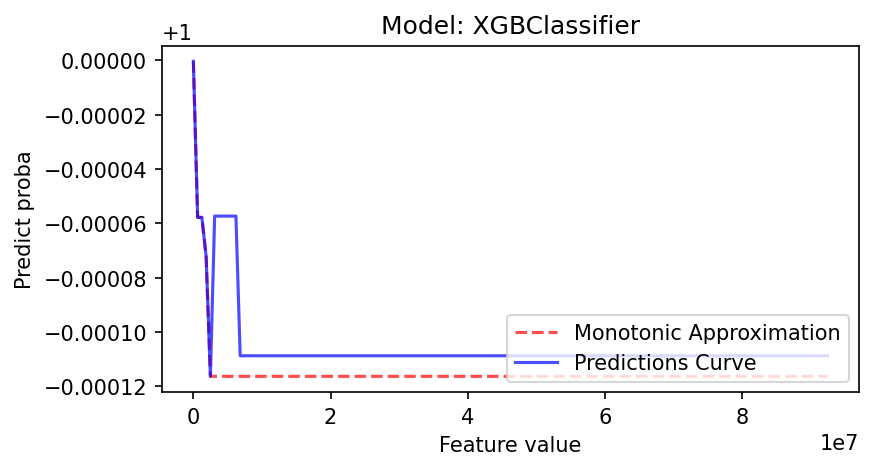

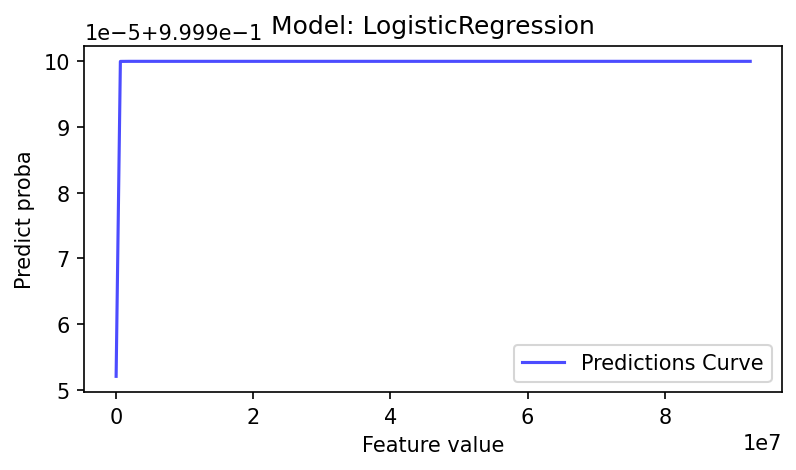

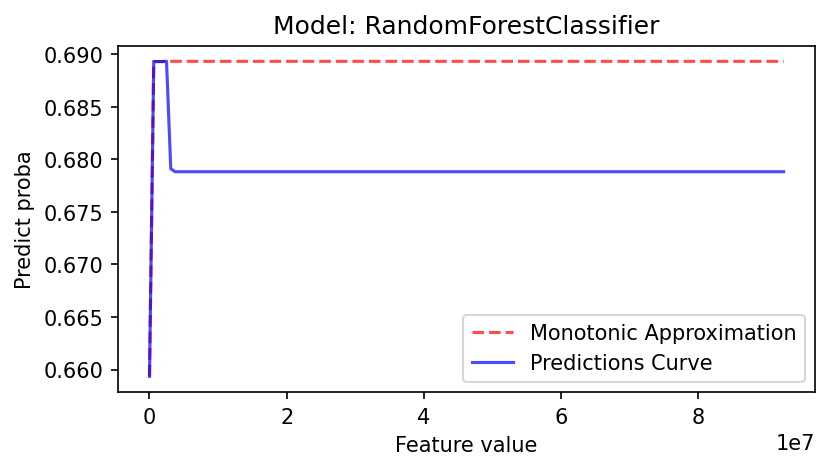

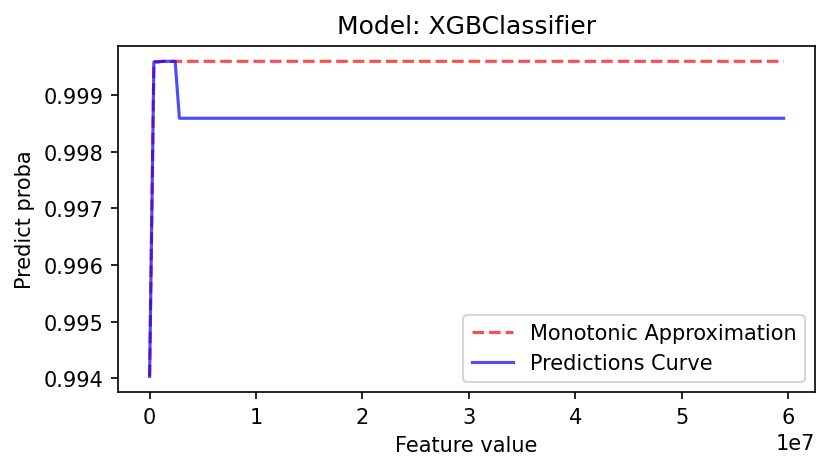

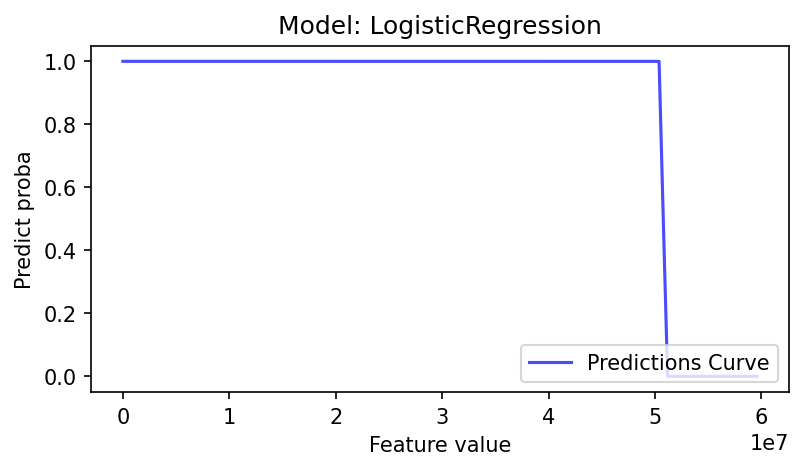

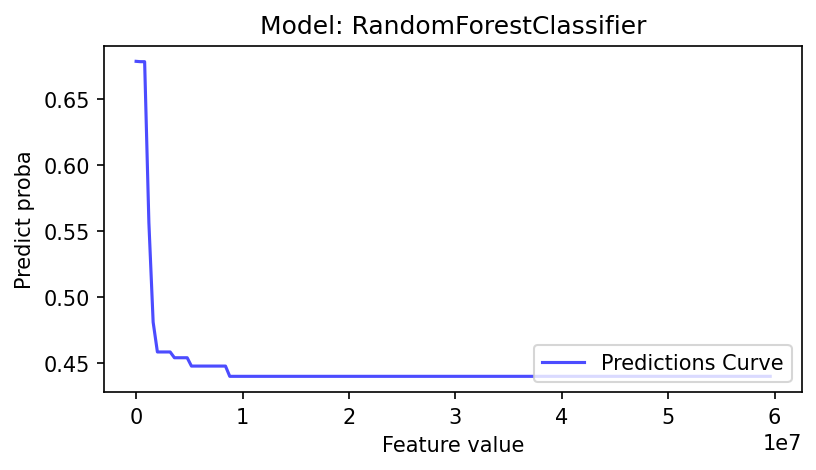

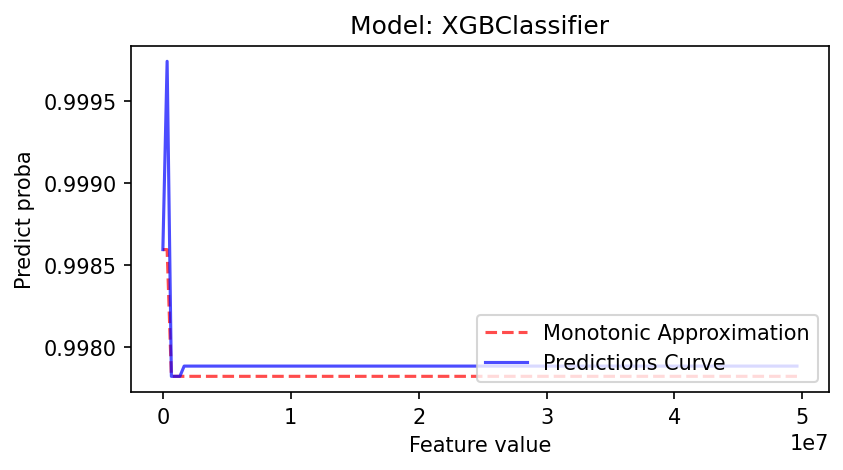

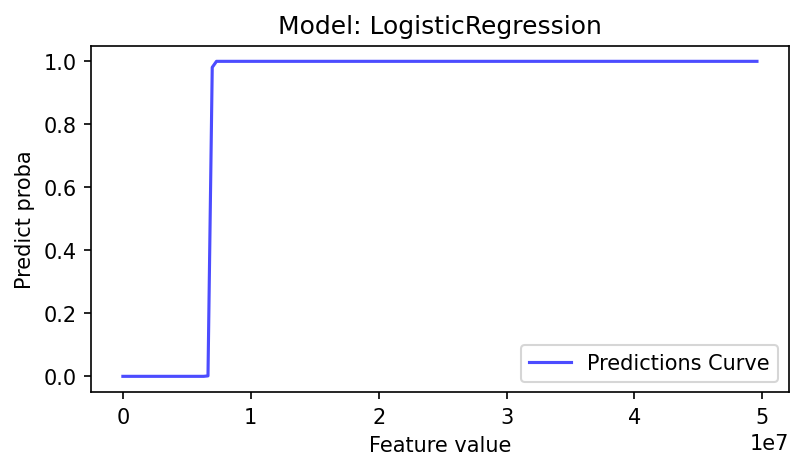

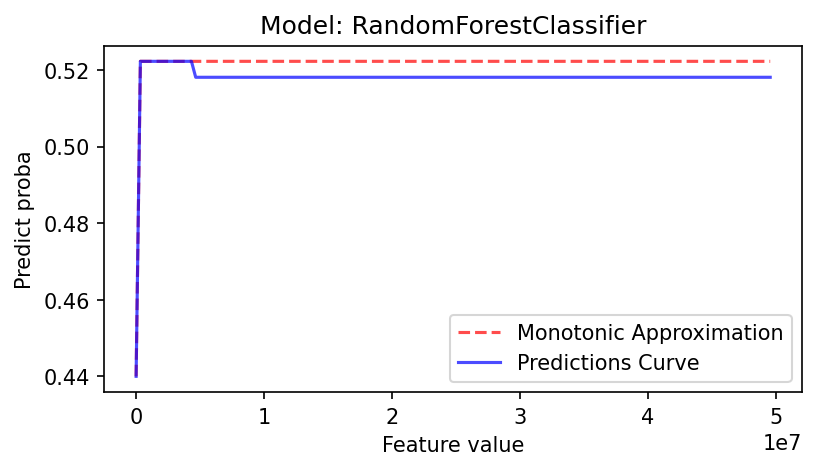

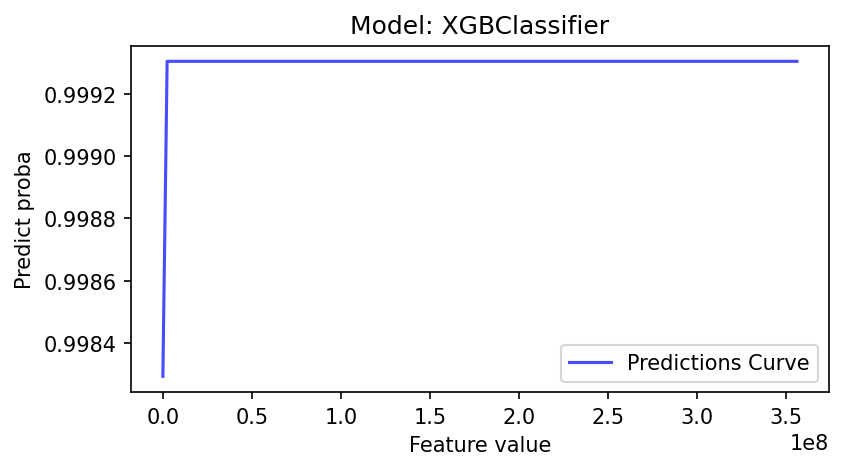

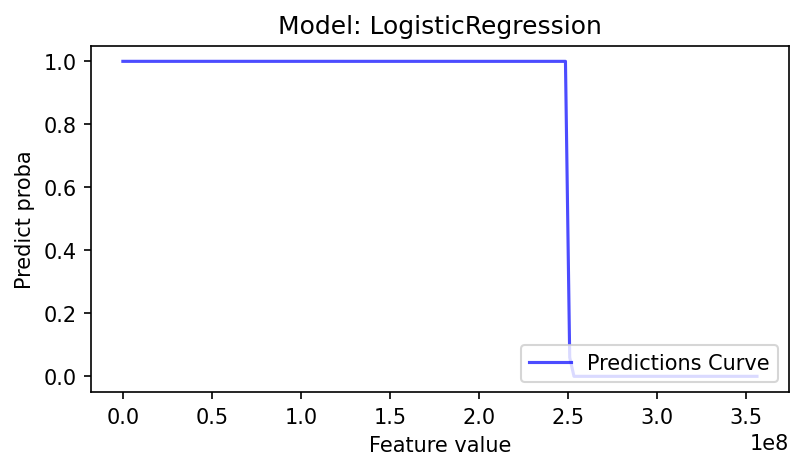

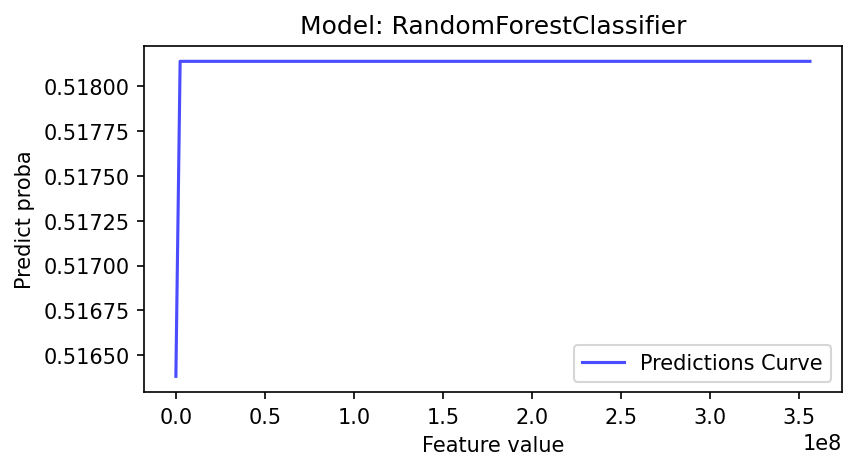

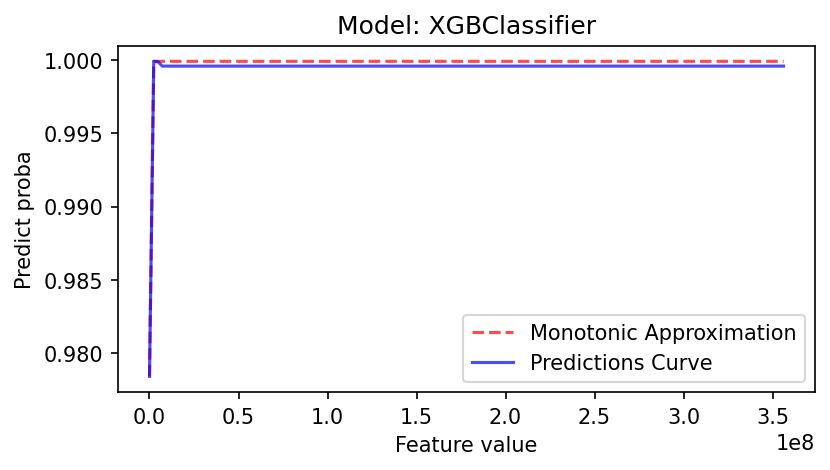

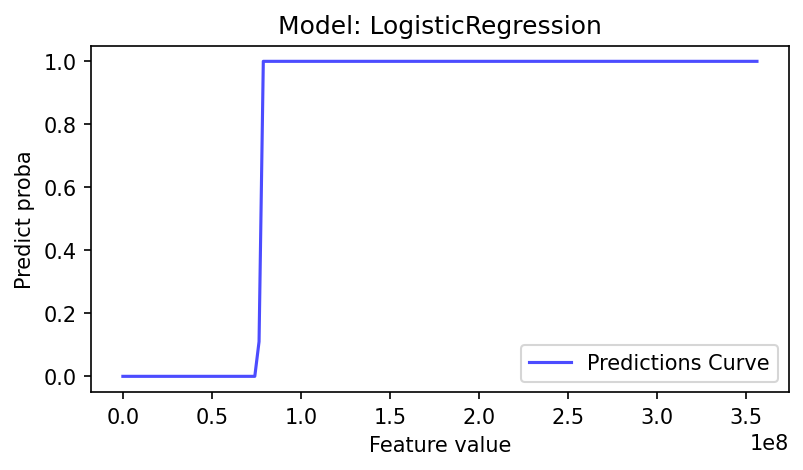

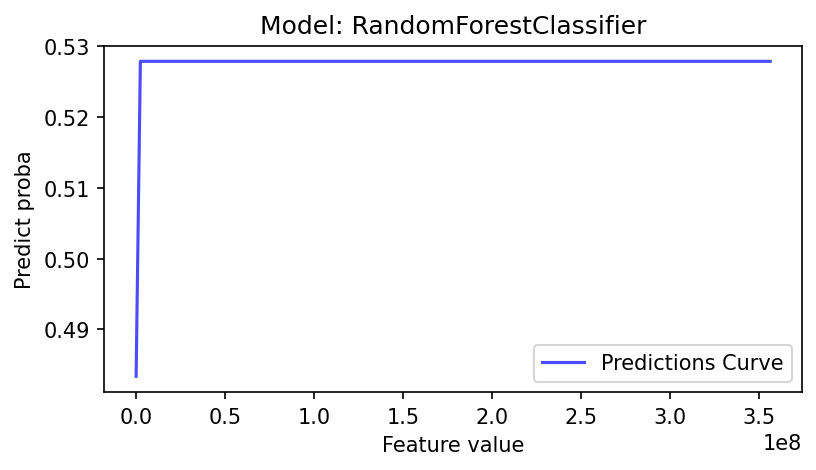

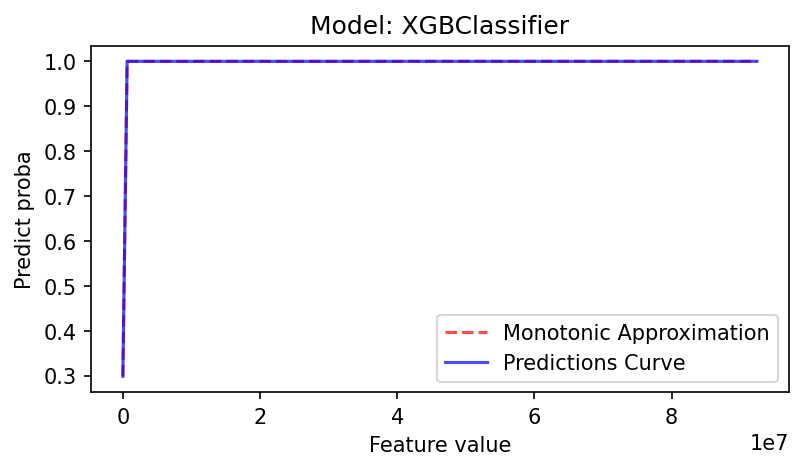

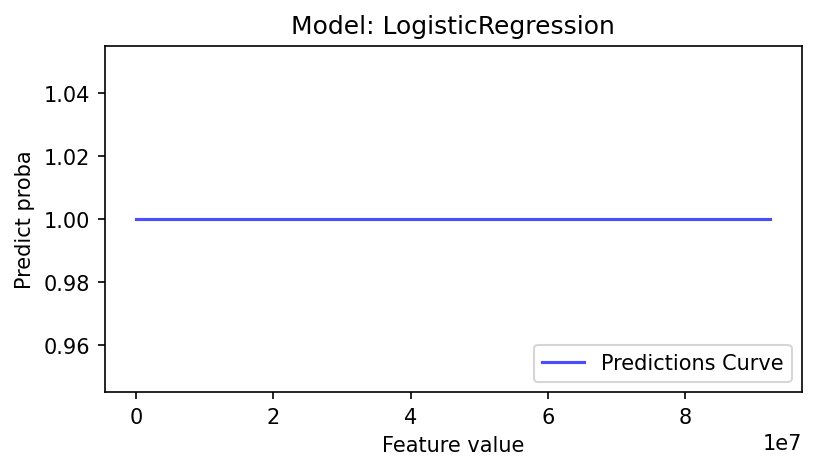

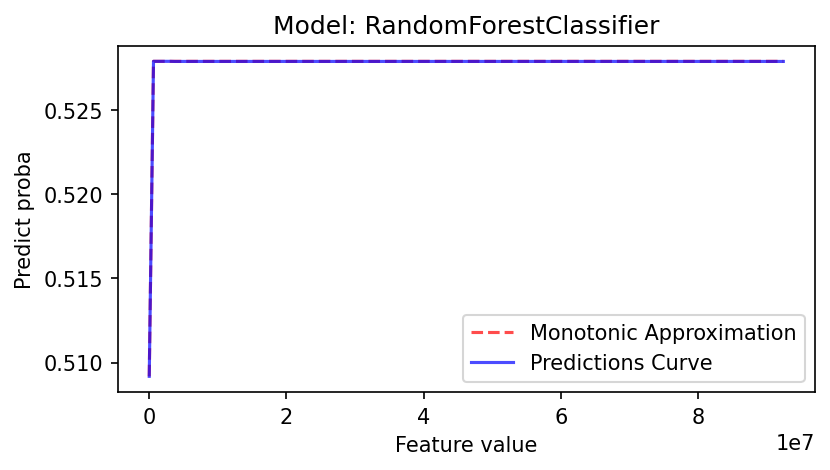

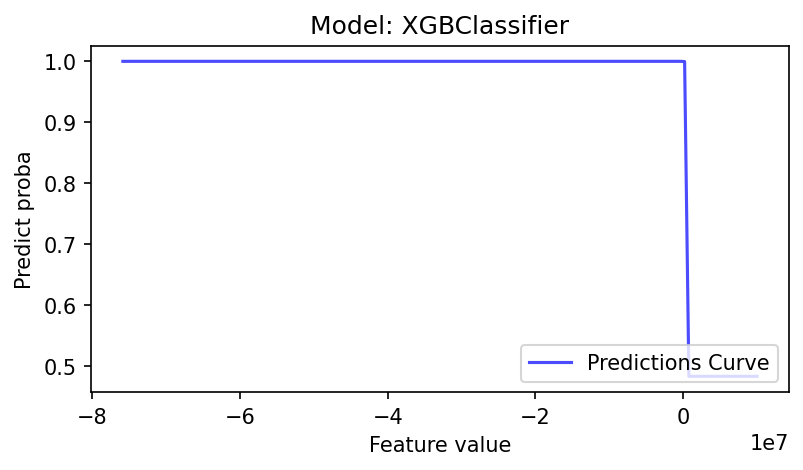

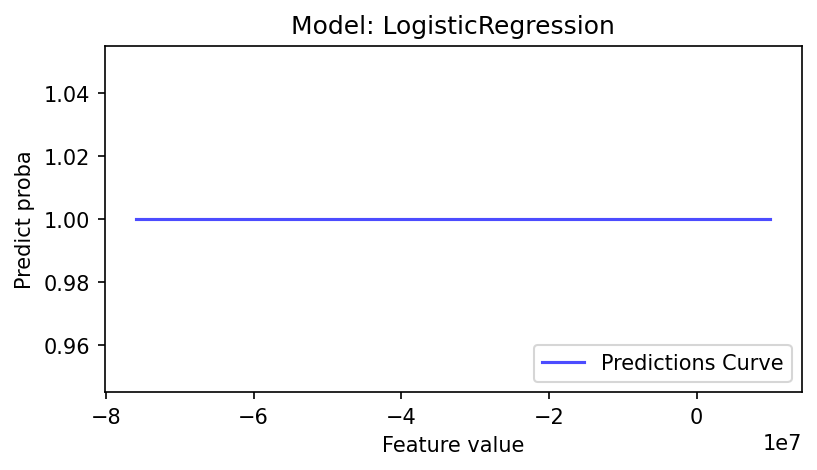

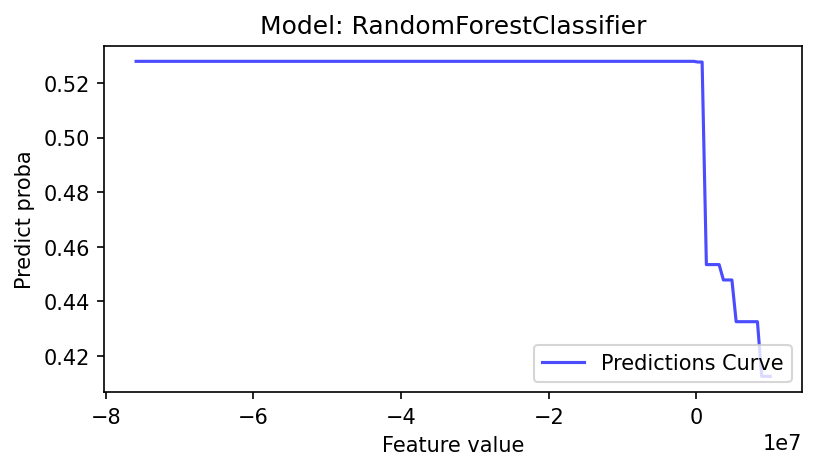

In [32]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            # check_monotonicity(c,minV,maxV,example, model, 150, plot_graph=True)
            check_monotonicity(c,minV,maxV,example, model, 150)

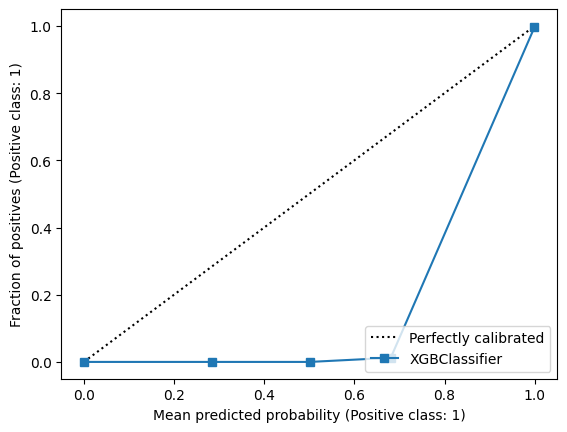

In [33]:
for model in models:
    teste2 = calibration_check("isFraud", model, df)
    break

In [34]:
teste2.save_graphs()

In [35]:
teste2.graphs

[<Figure size 640x480 with 1 Axes>]